### Simple Breast Cancer Biopsy Classification

Background:
* Breast cancer tumors are very complicated at the cellular level, and this makes determining whether a patient's tumor is malignant (dangerous) or benign (not dangerous) a challenge

* Every patient that arrives at the hospital undergoes a biopsy of their tumor

* the radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension of the sample is recorded


Goal:
* To build a classifier that can determine whether a sample of a potential breast cancer tumor is malignant or benign
* Using a large dataset of labeled biospy samples from breast cancer tumors, building a binary classification model to determine whether a tumor is malignant or benign based on these features

## Process:

#### 1. Background and data exploration

- Exploring the data

#### 2. Simple boundary classifier

- Separating on a boundary
- Precision, recall, accuracy

#### 3. Modifying with logistic regression

- Single feature logistic regression




# 1. Background and data exploration

## Diagnosing cancer with biopsies



![alt text](https://www.rxdatascience.com/hubfs/Raj%20Files/es1.jpg)

* example of cancerous (malignant) breast cells next to benign cells
* the cells in this sample are strained with different dyes to visualize their shapes, how much DNA they have, etc.
* All these properties can help to give hints as to whether cells are rapidly dividing cancer cells or not.

Our dataset reports 10 different features of the biopsies:

1. $Radius$: Average distance from the center of the cell's nucleus to its perimeter.
2. $Perimeter$: Total distance between points defining the cell's nuclear perimeter.
3. $Area$: Nuclear area is measured by counting the number of pixels on the interior of the nucleus and adding one-half of the pixels in the perimeter.

![perimeter](https://drive.google.com/uc?export=view&id=1-U43OAojYbMY9gIlpvLHPNr3V2saqqHJ)

4. $Compactness$: Calculated as the compactness of the cell nuclei using the
formula $perimeter^2/area$
5. $Smoothness$: Measures the smoothness of a nuclear contour by measuring the difference between the length of a radial line and the mean length of the lines surrounding it. The image below demonstrates this:

![alt text](https://drive.google.com/uc?export=view&id=10GokzG7KDKxClJwHPIuIcr3ivvWGRetY)


The paper that first detailed these measurements for this dataset can be found here for more information: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf


## Breast cancer diagnostic dataset

Our Dataset for Training: The Breast Cancer Wisconsin (Diagnostic) Data Set
(consists of 569 biopsy samples from breast cancer tumors.)


* Each biopsy sample in the dataset is labeled with an ID number and whether or not the tumor it came from is malignant (M) or benign (B).
* Each sample also has 10 different features associated with it

In [1]:
#downloading data
import gdown
import pandas as pd
from sklearn import metrics
gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv',True);
data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

## Loading our annotated dataset

1) loading the dataset for training the model.

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
data_path  = 'cancer_data.csv'

In [4]:
dataframe = pd.read_csv(data_path)

 ## Looking at our dataset

 ####1

2) view the structure and dimensions of our new dataframe, which stores all training data from the tumor biopsies

In [5]:
# A few of the biopsy sample features
dataframe = dataframe[['diagnosis','radius_mean','area_mean', 'radius_se', 'area_se', 'smoothness_mean','smoothness_se']]
dataframe.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,1,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,1,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,1,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,1,20.29,1297.0,0.7572,94.44,0.10030,0.011490


Each feature column:

* $diagnosis$: Whether or not the tumor was diagnosed as malignant (M) or benign (B).
* $radius$_$mean$: The radius data feature, averaged across cells in that particular biopsy
* $area$_$mean$: The area data feature, averaged across cells in that particular biopsy
* $radius$_$se$: The standard error of the radius data feature for cells in that particular biopsy
* $area$_$se$: The standard error of the area data feature for cells in that particular biopsy
* $smoothness$_$mean$: The smoothness feature, averaged across cells in that particular biopsy
* $smoothness$_$se$: The standard error of the smoothness data feature for cells in that particular biopsy

standarded error: gives a sense of the standard deviation

In [6]:
# viewing the data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int64  
 1   radius_mean      569 non-null    float64
 2   area_mean        569 non-null    float64
 3   radius_se        569 non-null    float64
 4   area_se          569 non-null    float64
 5   smoothness_mean  569 non-null    float64
 6   smoothness_se    569 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


# 2. Simple boundary classifier

Approach: First just looking at one feature of the data samples and see how well its value predicts M vs. B for our dataset

## Q: Can mean radius predict diagnosis?

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

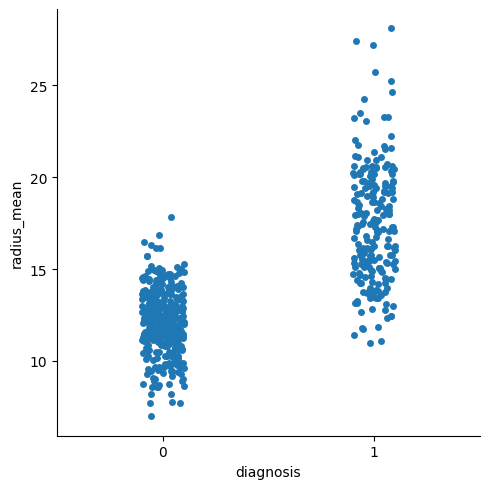

In [8]:
# Plot data to see how well radius correlated with diagnosis
# separated based on diagnosis category on the x-axis and have the points' y-value
# be its mean radius value

sns.catplot(x = 'diagnosis', y = 'radius_mean', data = dataframe)

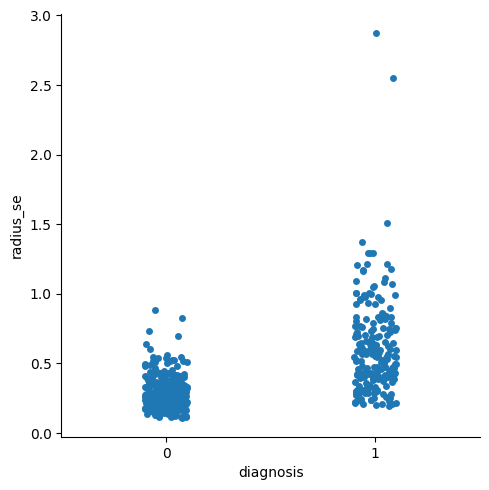

In [9]:
sns.catplot(x = 'diagnosis', y = 'radius_se', data = dataframe)
#radius_se, radius_mean, smoothness_se, smoothness_mean, area_se, area_mean

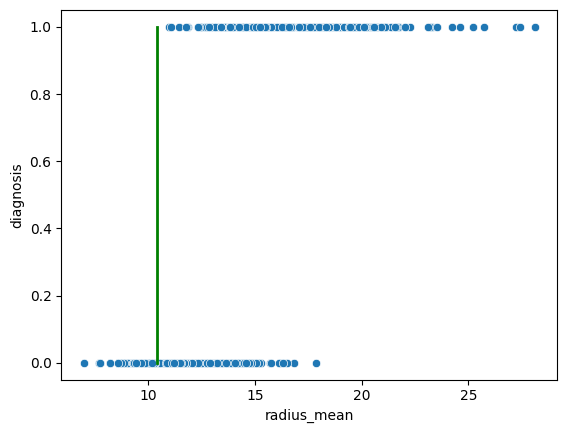

In [10]:
# picking boundary value for the radius mean and see how well it separates the data
boundary = 10.4
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = dataframe)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 2)

#green line = boundary we have picked

This boundary value does not separate the data well

Using a boundary value --> build a boundary classifier function

#### Building the boundary classifier

Next step: Build a function that takes in a target boundary (value of radius mean) and a series of data, and assigns a class to each value in the data if it is above or below the boundary classifer.


In [11]:
def boundary_classifier(target_boundary, x):
  result = []
  for i in x:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result

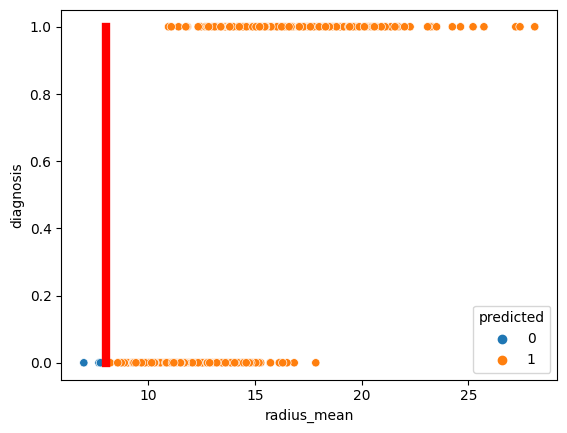

In [12]:
# choose a boundary and run it

chosen_boundary = 8
y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
# print(y_pred)
dataframe['predicted'] = y_pred
dataframe.head()
y_true = dataframe['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted', data = dataframe)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'r', linewidth = 6)

In [13]:
accuracy = metrics.accuracy_score(y_true,y_pred)
print(accuracy)
print(dataframe[['diagnosis', 'predicted']].head())

0.37961335676625657
   diagnosis  predicted
0          1          1
1          1          1
2          1          1
3          1          1
4          1          1


**we can adjust the chosen boundary above to try to get the best possible 'separation'**

## Q: What makes a separation good?


Depending on which value is chosen, the data points are classified slighly differently.

Different ways of evaluating classification:

**True positive rate (TPR)**: Sometimes called sensitvity, the TPR is the proportion of actual positives that are correctly identified as such. An analogy would be the percentage of sick people who are correctly identified as having the disease in some population.

**True negative rate (TNR)**: Sometimes called specificity, the TNR is the proportion of actual negatives that are correctly identified as such. An analogy would be the the percentage of healthy people who are correctly identified as not having the disease in some population.

**False positive rate (FPR)**: The FPR is the proportion of actual negatives that are incorrectly identified as positives. An analogy would be the percentage of healthy people who are incorrectly identified as having the disease.

**False negative rate (FNR)**: The FPR is the proportion of actual positives that are incorrectly identified as negatives. An analogy would be the percentage of sick people who are incorrectly identified as healthy.

There is a tradeoff when trying to reduce the different types of errors

###3

Evaluating the performance of model quantitatively.

Visualize statistics on the number of correct vs. incorrect predictions using a plot called a Confusion Matrix


Text(0.5, 427.9555555555555, 'Predicted diagnosis')

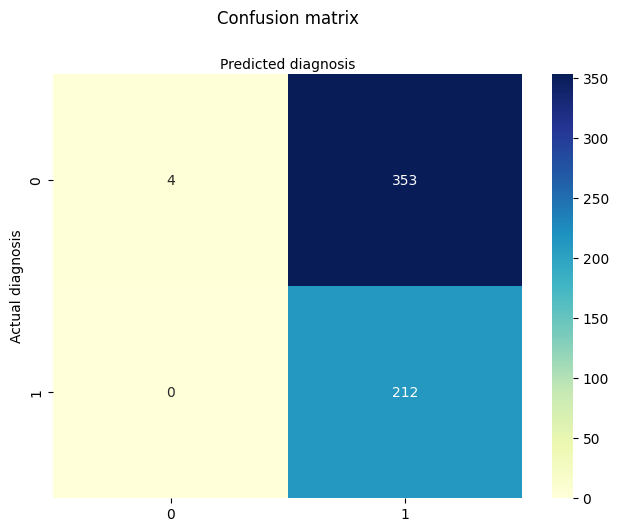

In [14]:
# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

Calculating how well the boundary model does using sklearn using following functions:
* `accuracy = metrics.accuracy_score(y_test, y_pred)`
* `precision = metrics.precision_score(y_test, y_pred)`
* `recall = metrics.recall_score(y_test, y_pred)`


In [16]:
#function that calculates each of the metrics and prints their values:

def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [17]:
y_test = dataframe['diagnosis']
y_pred = dataframe['predicted']
model_stats(y_test, y_pred)

Accuracy:  0.37961335676625657
Precision:  0.3752212389380531
Recall:  1.0


# Finding a better separation with logistic regression



### 4

Working towards implementing an approach that can automatically find a better separation

One of the most common methods : Logistic Regression

First step: just using the radius_mean feature

In [18]:
from sklearn import linear_model

### Training Data vs Test Data

Split up data set into 'train' and 'test' groups

In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.4, random_state = 1)


In [20]:
print('\n\nTraining dataframe has %d rows'%train_df.shape[0])
train_df.head()



Training dataframe has 341 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
164,1,23.270,1686.0,0.6642,97.85,0.08439,0.004910,1
13,1,15.850,782.7,0.4033,36.58,0.08401,0.009769,1
430,1,14.900,685.0,0.2530,24.19,0.09947,0.006965,1
61,0,8.598,221.8,0.3582,18.39,0.12430,0.011930,1
427,0,10.800,359.9,0.3077,20.20,0.08801,0.006543,1


In [21]:
print('\n\nTesting dataframe has %d rows'%test_df.shape[0])
test_df.head()



Testing dataframe has 228 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se,predicted
421,0,14.69,656.1,0.5462,49.45,0.10310,0.009976,1
47,1,13.17,534.6,0.2871,24.25,0.11580,0.006532,1
292,0,12.95,513.7,0.2094,17.67,0.10050,0.008725,1
186,1,18.31,1041.0,0.2577,28.92,0.08588,0.002866,1
414,1,15.13,719.5,0.4681,45.38,0.08320,0.006831,1


### Single Variable Logistic Regression
Set input feature to be radius mean and output variable to be the diagnosis

In [22]:
input_labels = ['radius_mean']
output_label = 'diagnosis'


x_train = train_df[input_labels]
print('Our x variables')
print(x_train.head())
print('\n\n')

y_train = train_df[output_label]
print('Our y variable:')
print(y_train.head())

Our x variables
     radius_mean
164       23.270
13        15.850
430       14.900
61         8.598
427       10.800



Our y variable:
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64


In [23]:
# Creating a 'reg' object that handles the line fitting
class_rm = linear_model.LogisticRegression()

###Next: take in inputs (x) and true labels (y) and fit a line that predicts y from x using 'class_rm'


In [25]:
class_rm = linear_model.LogisticRegression()
class_rm.fit(x_train, y_train)

LogisticRegression()

### Test on unseen data to see if 'model' is actually 'learning' anything

Designate test inputs to check model

In [26]:
x_test = test_df[input_labels]

true or actual values for the test inputs


In [27]:
y_test = test_df[output_label]

###figure out what the line thinks the diagnosis is based on our data points

In [28]:
y_pred = class_rm.predict(x_test)

In [30]:
print(y_pred)

[1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1]


Visualize the results

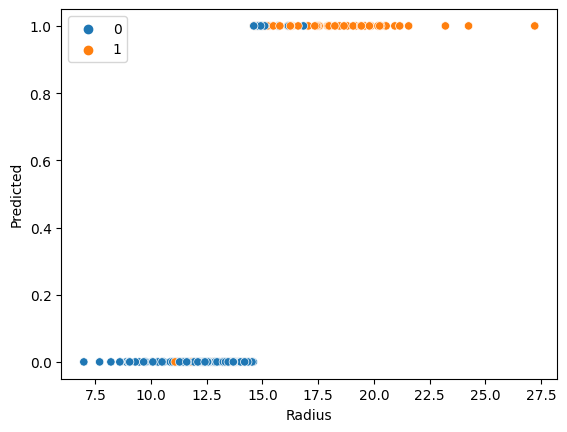

In [31]:
x_test_view = x_test[input_labels].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

### Re-evalute the recall, accuracy, and precision for the model by calling the functions created

In [33]:
model_stats(y_test, y_pred)

Accuracy:  0.8552631578947368
Precision:  0.7831325301204819
Recall:  0.8125


## Giving 'soft' predictions


<Axes: >

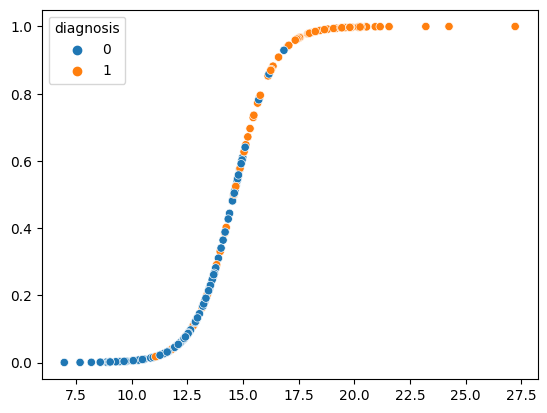

In [34]:
# Visualize the probabilities for `x_test`
y_prob = class_rm.predict_proba(x_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)

Y-axis is the  probability of being 'malignant' and the X-axis is the radius mean.

## How logistic regression relates to linear regression



linear regression establishes a relationship between the independent and dependent variables

particularly useful when we want to estimate the dependent variable based on the value of the independent variable(s).

Logistic regression predicts a probability between 0 and 1 (e.g. whether or not a tumor is malignant or benign).

Linear regression will yield a line while logistic regression an S-shaped curve.
